# DSC540 Project 2 - Noor Razi Ali Syed

DePaul University  
Ilyas Ustun, PhD  
Chicago, IL  

## Rules
- Do not change the code already present in the notebook.
- Write your code under the corresponding questions where you see `# Code here`. You are encouraged to use more than one cell.
- Provide explanation in a separate Markdown formatted cell. 
- You can change the cell type by:
    - Clicking on the outer area of the cell type you want to change,
    - Go to the top, and select either Code or Markdown from the dropdown menu.
- Be concise in your explanations and conclusions.
- Write clear code and provide explanation to functions you create by using `#` comment sign.
- For built-in function and methods you use from libraries, provide a very brief explanation of what they do.
- Try to answer the questions by yourself. Use documentation from pandas, sklearn and similar libraries to solve the problem.
- If you are stuck you can use different resources. Do not find an identical project and copy paste the solutions. 
- Write your name before beginning to code.


Important:  
- **Do NOT share the solutions with other people.**
- **Do NOT share the solutions on the internet including but not limited to Github and other platforms.**
- Sign the Honor Pledge below indicating that you have agreed to these rules listed here, and any other ethical and honor rules as required by the university.



- **Deliverables:**
    1. The Python Jupyter notebook file named properly with your name. Example: dsc540_project1_john_doe.ipynb
    2. The HTML output of this code notebook names the same way. Example: dsc540_project1_john_doe.html
        - File -> Download as -> HTML   
    
> **Do not ZIP the files.**

Good Luck!

### Syed Noor Razi Ali

**Honor Pledge:**  
I pledge on my honor that I, **Syed Noor Razi Ali**, have followed the rules listed above, that I have not given or received any unauthorized assistance on this assignment. 



## Project Description

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com).  
Lending Club connects people who need money (borrowers) with people who have money (investors).   
Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Check out more info on Lending Club on [Wikipedia](https://en.wikipedia.org/wiki/Lending_Club). Lending Club also had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016).

This dataset is from before they went public.

We will use lending data from 2007-2010 and will try to classify and predict whether or not the borrower paid back their loan in full. You will analyze the data file provided. 

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
* not.fully.paid: Whether the loan was paid back or not.

## Import Libraries

**Import the usual libraries for pandas and plotting, and sklearn.**

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install numpy

In [3]:
!pip install pandas==0.25.3

In [4]:
%config InlineBackend.figure_format ='retina'
RANDOM_STATE = 42

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

In [103]:
import sklearn
sklearn.__version__

'1.0.2'

In [104]:
pd.set_option('display.max_columns', 100)

### These are the packages I used

In [125]:
# Your package imports here

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# Q1
- Read in the dataset `loan_data.csv`
- How many rows and variables are there?
- What are the unique values of `not.fully.paid`?
- `not.fully.paid` having a value of 1 means that the person who took the loan did not fully pay it back. What's the proportion of those people in the full dataset?

## Get the Data

**Use pandas to read in the datasets as a dataframe.**

In [106]:
loans = pd.read_csv('loans.csv')

In [107]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1183,231.94,10.348846,5.69,712,2460.958333,6955,63.8,1,0,0,0
1,1,major_purchase,0.0774,124.88,11.264464,7.17,792,6360.041667,168,0.7,0,0,0,0
2,1,credit_card,0.1505,86.73,11.184421,16.30,667,3600.000000,16242,95.5,0,0,0,0
3,1,debt_consolidation,0.1284,403.42,10.736397,19.57,697,3450.041667,27261,87.4,1,0,0,0
4,1,debt_consolidation,0.1531,278.53,10.621327,8.20,662,1860.000000,7979,48.7,0,1,0,0


**Check out the info(), head(), and describe() methods on loans.**

In [108]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 14 columns):
credit.policy        2981 non-null int64
purpose              2981 non-null object
int.rate             2981 non-null float64
installment          2981 non-null float64
log.annual.inc       2981 non-null float64
dti                  2981 non-null float64
fico                 2981 non-null int64
days.with.cr.line    2981 non-null float64
revol.bal            2981 non-null int64
revol.util           2981 non-null float64
inq.last.6mths       2981 non-null int64
delinq.2yrs          2981 non-null int64
pub.rec              2981 non-null int64
not.fully.paid       2981 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 326.2+ KB


In [109]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1183,231.94,10.348846,5.69,712,2460.958333,6955,63.8,1,0,0,0
1,1,major_purchase,0.0774,124.88,11.264464,7.17,792,6360.041667,168,0.7,0,0,0,0
2,1,credit_card,0.1505,86.73,11.184421,16.30,667,3600.000000,16242,95.5,0,0,0,0
3,1,debt_consolidation,0.1284,403.42,10.736397,19.57,697,3450.041667,27261,87.4,1,0,0,0
4,1,debt_consolidation,0.1531,278.53,10.621327,8.20,662,1860.000000,7979,48.7,0,1,0,0


In [110]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2.981000e+03,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000
mean,0.748071,0.125977,326.020778,10.898762,12.794119,705.839316,4460.703008,1.826035e+04,48.442170,1.868165,0.171419,0.073465,0.480711
std,0.434193,0.026565,213.108504,0.650773,6.986455,37.073906,2486.531742,4.029009e+04,29.251287,2.567033,0.526928,0.271035,0.499712
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,180.041667,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.109600,165.630000,10.498250,7.170000,677.000000,2760.041667,2.979000e+03,24.700000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.125300,275.570000,10.915088,12.870000,702.000000,4043.000000,8.493000e+03,48.800000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.142600,457.050000,11.289782,18.350000,732.000000,5640.041667,1.853800e+04,72.500000,3.000000,0.000000,0.000000,1.000000
max,1.000000,0.216400,926.830000,14.124465,29.960000,817.000000,17616.000000,1.207359e+06,119.000000,33.000000,6.000000,3.000000,1.000000


# Q2
- Visual and Exploratory Analysis
- Carry out the tasks given below

## Exploratory Data Analysis

- Let's do some data visualization! 
- You can use many different visualization libraries inclusing matplotlib, seaborn, pandasand many more. Feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

**Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

*Note: You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()*

Text(0.5, 0, 'FICO')

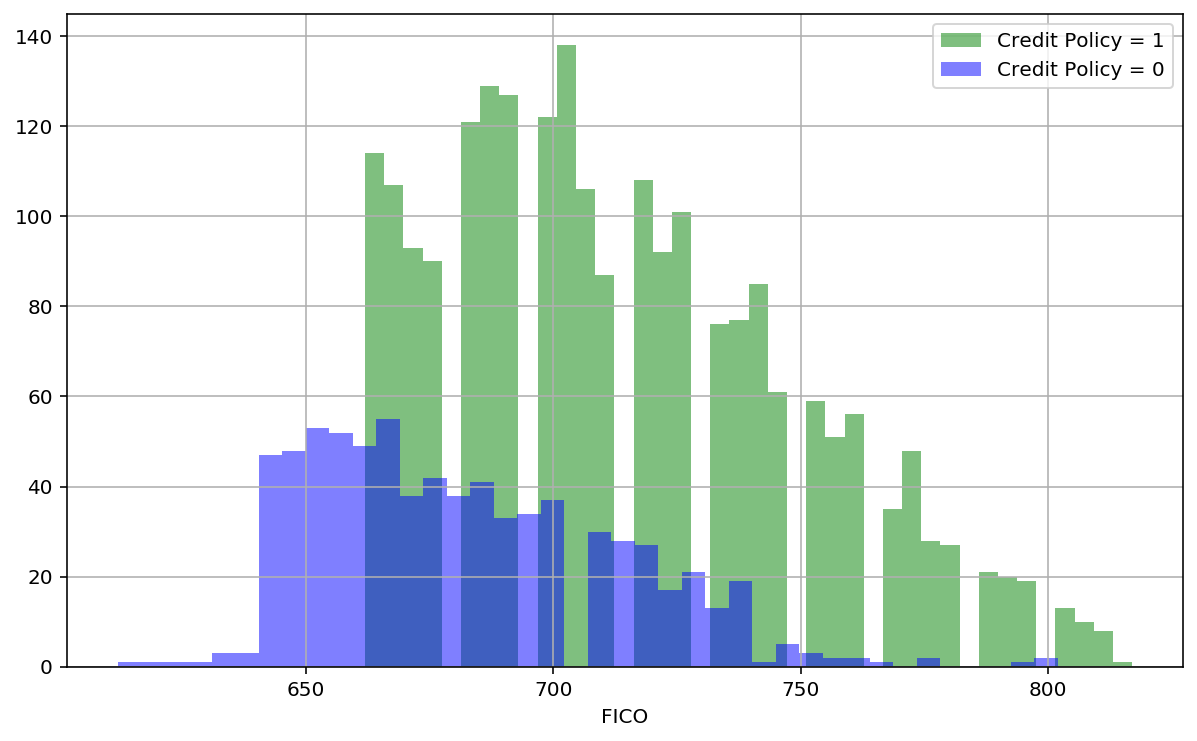

In [111]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(bins=40,color='green', alpha=0.5,label='Credit Policy = 1')
loans[loans['credit.policy']==0]['fico'].hist(bins=40,color='blue', alpha=0.5,label='Credit Policy = 0')
plt.legend()
plt.xlabel("FICO")

Text(0.5, 0, 'FICO')

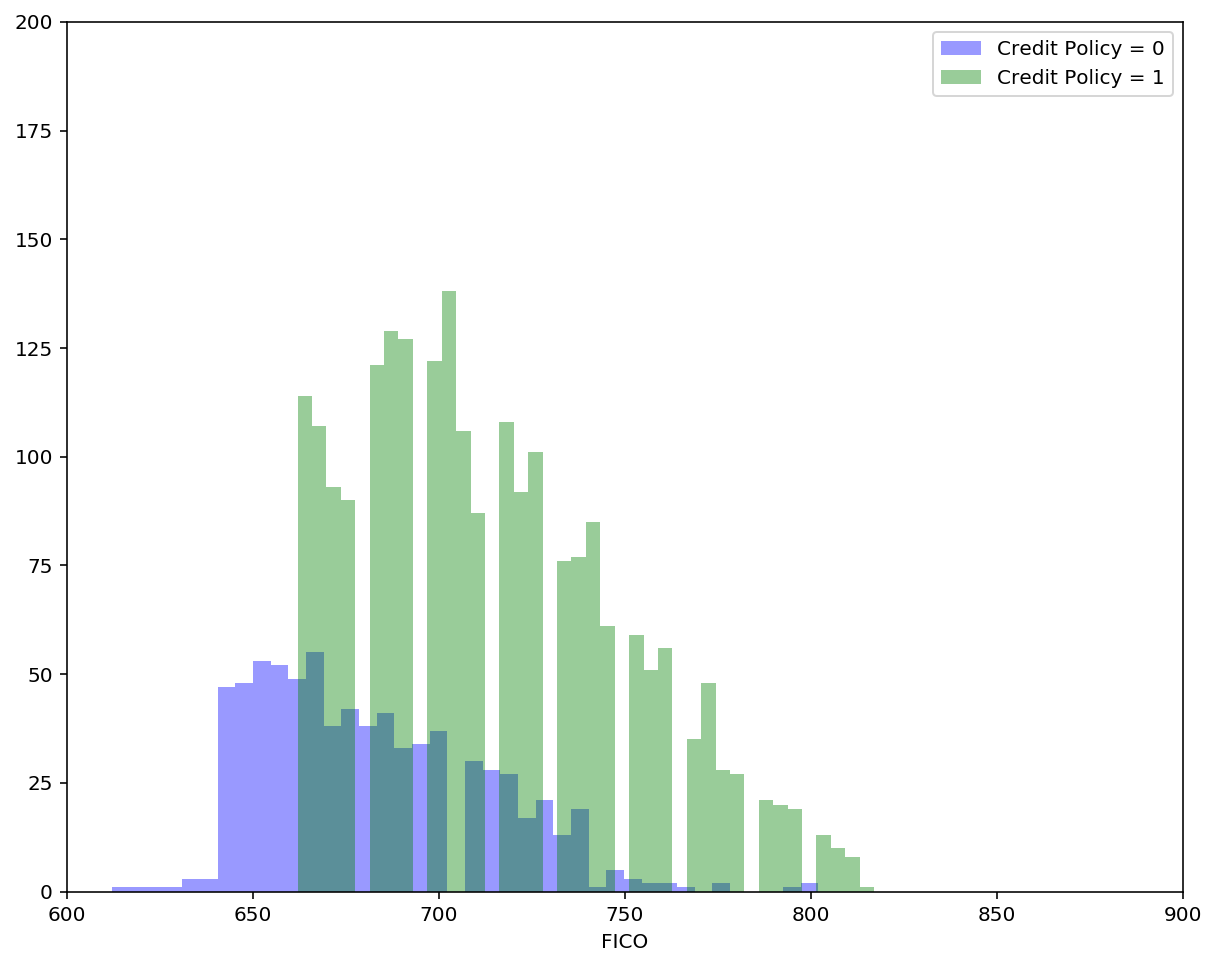

In [112]:
# Alternatively you can use seaborn library to create the same histogram (although due to bin creation, it might look different!)

import seaborn as sns
plt.figure(figsize=(10,8))
sns.distplot(loans[loans['credit.policy'] == 0]['fico'], bins = 40, kde = False, color = 'blue', label = 'Credit Policy = 0')
sns.distplot(loans[loans['credit.policy'] == 1]['fico'], bins = 40, kde = False, color = 'green', label = 'Credit Policy = 1')
plt.xlim(600,900)
plt.ylim(0,200)
plt.legend(loc = 1)
plt.xlabel('FICO')

**Create another histogram for `not.fully.paid` column.**

Text(0.5, 0, 'FICO')

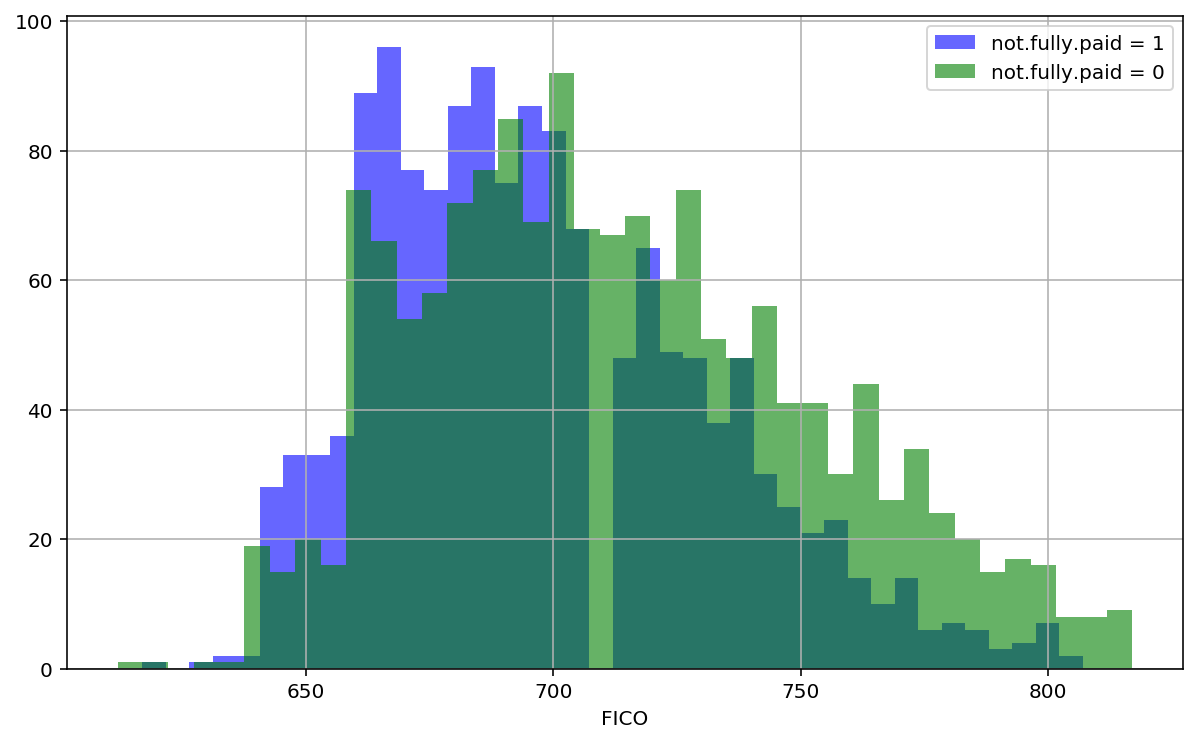

In [113]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(bins=40,color='blue', alpha=0.6,label='not.fully.paid = 1')
loans[loans['not.fully.paid']==0]['fico'].hist(bins=40,color='green', alpha=0.6,label='not.fully.paid = 0')
plt.legend()
plt.xlabel("FICO")

**Create a countplot (bar plot showing counts using seaborn) that shows the counts of loans by purpose, with the color hue defined by `not.fully.paid`**

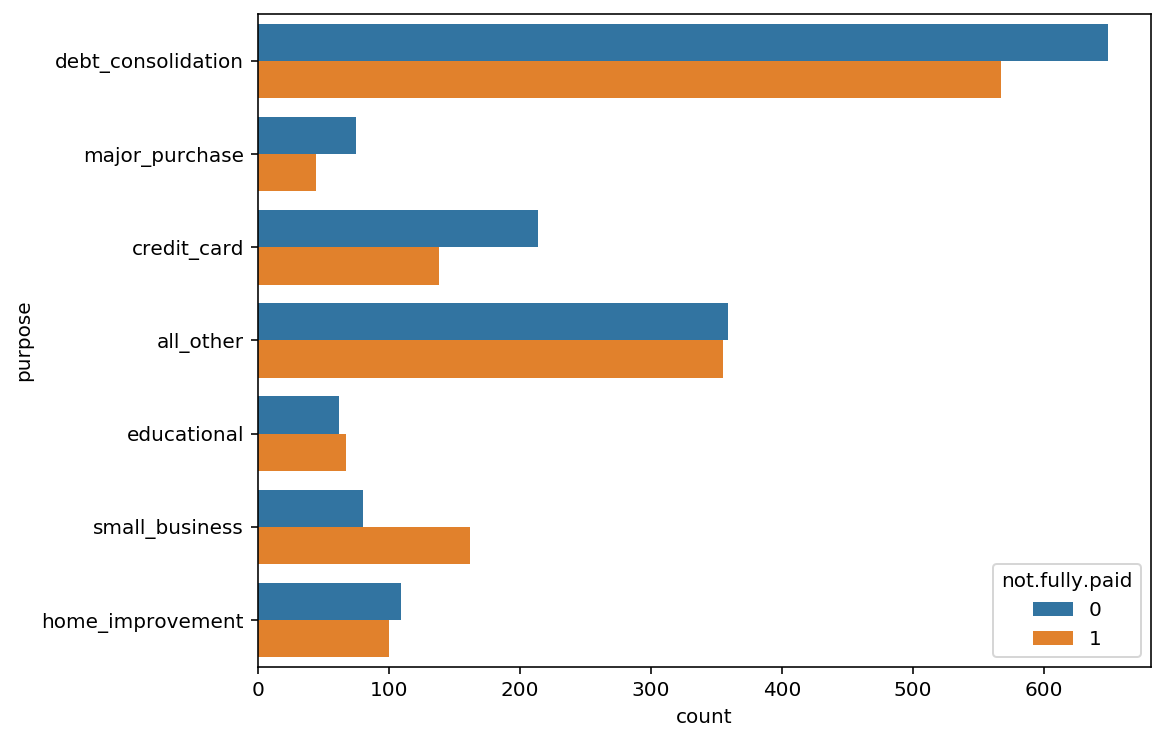

In [114]:
plt.subplots(figsize = (8,6))
sns.countplot(y = 'purpose', hue = 'not.fully.paid', data = loans)

**Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

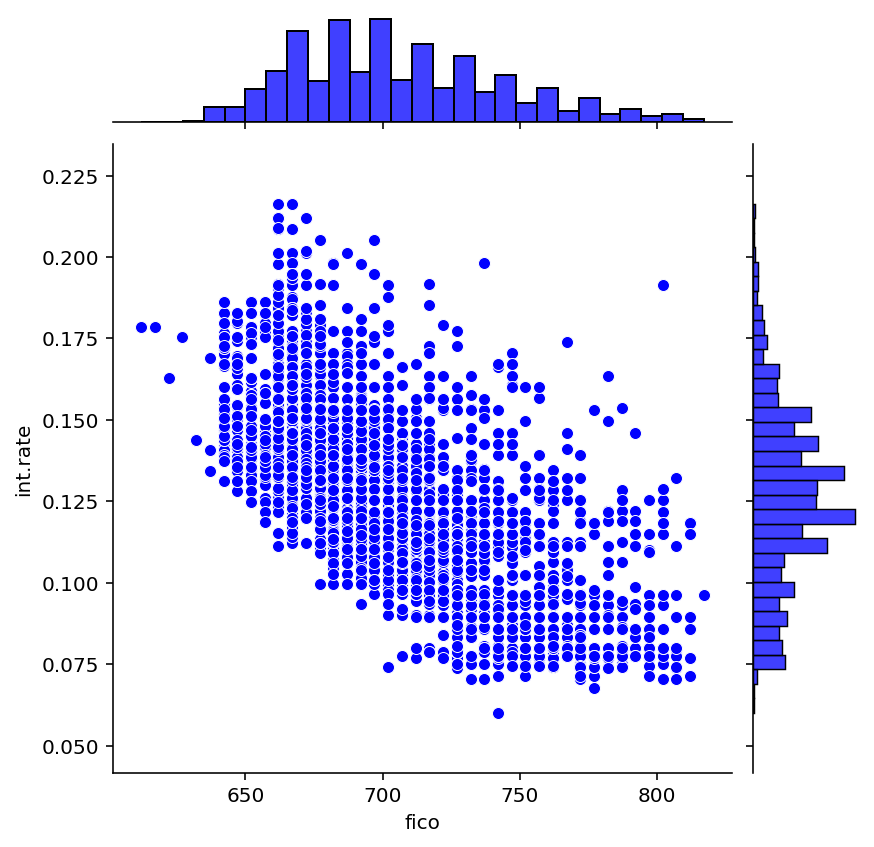

In [115]:
sns.jointplot(x = 'fico', y = 'int.rate', data = loans, color="b")

**Create the following lmplots to see if the trend differed between `not.fully.paid` and `int.rate`. Check the documentation for seaborn `lmplot()` if you can't figure out how to separate it into columns.**

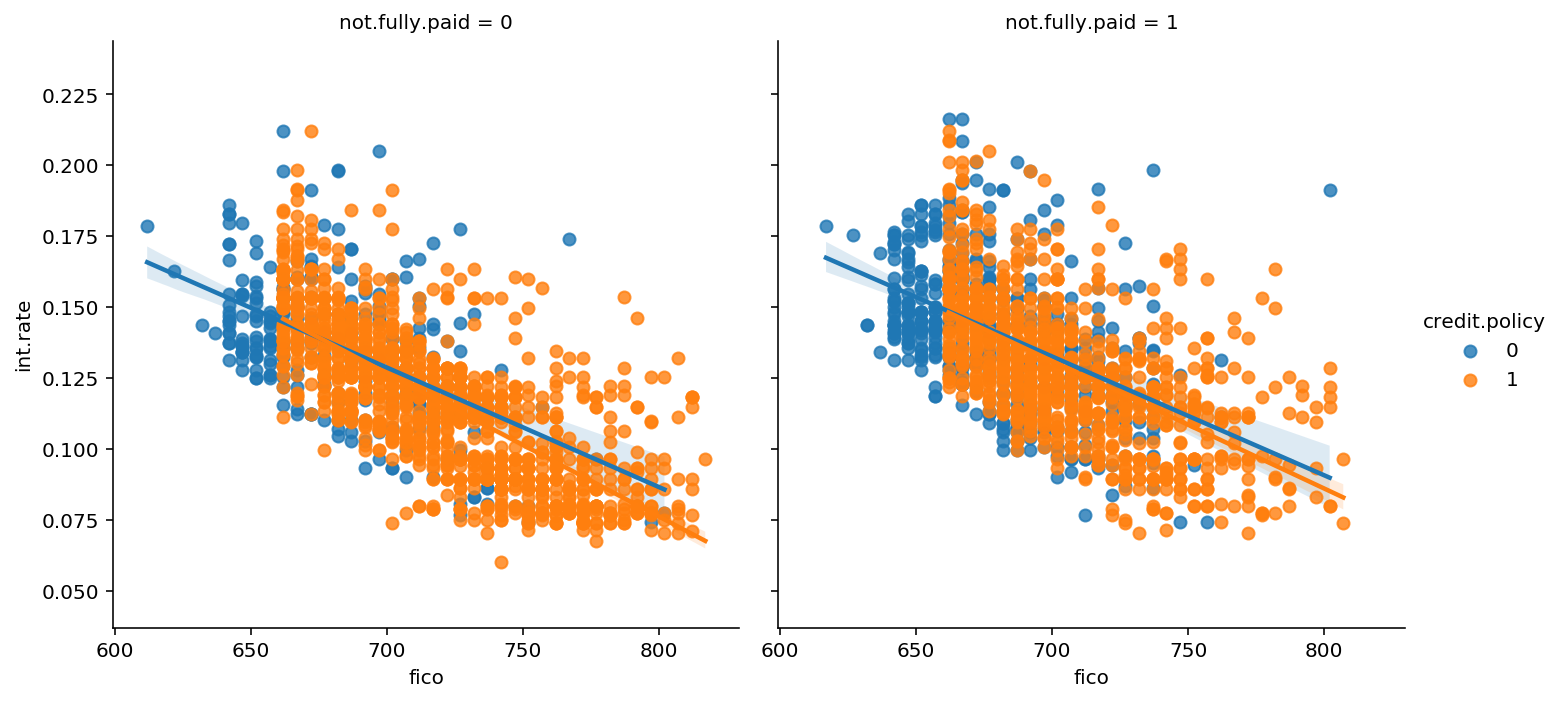

In [116]:
sns.lmplot(x = 'fico', y = 'int.rate', col = 'not.fully.paid', hue = 'credit.policy', data = loans)

# Q3

## Setting up the Data

Let's get ready to set up our data for our models!

**This question has already been solved. You don't need to do anything. Just run the cells and continue.**

In [15]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 14 columns):
credit.policy        2981 non-null int64
purpose              2981 non-null object
int.rate             2981 non-null float64
installment          2981 non-null float64
log.annual.inc       2981 non-null float64
dti                  2981 non-null float64
fico                 2981 non-null int64
days.with.cr.line    2981 non-null float64
revol.bal            2981 non-null int64
revol.util           2981 non-null float64
inq.last.6mths       2981 non-null int64
delinq.2yrs          2981 non-null int64
pub.rec              2981 non-null int64
not.fully.paid       2981 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 326.2+ KB


## Categorical Features

Notice that the **purpose** column is of categorical type.

That means we need to transform them using dummy variables so sklearn will be able to understand them.   

Let's do this in one step using pd.get_dummies().


> The same transformation needs to be aplied on the test set as well. The easiest way would be to merge train and test sets, and to split after the transformation.

In [16]:
cat_feats = ['purpose']

In [17]:
loans = pd.get_dummies(loans, columns=cat_feats, drop_first=False)

In [18]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 20 columns):
credit.policy                 2981 non-null int64
int.rate                      2981 non-null float64
installment                   2981 non-null float64
log.annual.inc                2981 non-null float64
dti                           2981 non-null float64
fico                          2981 non-null int64
days.with.cr.line             2981 non-null float64
revol.bal                     2981 non-null int64
revol.util                    2981 non-null float64
inq.last.6mths                2981 non-null int64
delinq.2yrs                   2981 non-null int64
pub.rec                       2981 non-null int64
not.fully.paid                2981 non-null int64
purpose_all_other             2981 non-null uint8
purpose_credit_card           2981 non-null uint8
purpose_debt_consolidation    2981 non-null uint8
purpose_educational           2981 non-null uint8
purpose_home_improvement      2

In [19]:
loans.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1183,231.94,10.348846,5.69,712,2460.958333,6955,63.8,1,0,0,0,0,0,1,0,0,0,0
1,1,0.0774,124.88,11.264464,7.17,792,6360.041667,168,0.7,0,0,0,0,0,0,0,0,0,1,0
2,1,0.1505,86.73,11.184421,16.30,667,3600.000000,16242,95.5,0,0,0,0,0,1,0,0,0,0,0
3,1,0.1284,403.42,10.736397,19.57,697,3450.041667,27261,87.4,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1531,278.53,10.621327,8.20,662,1860.000000,7979,48.7,0,1,0,0,0,0,1,0,0,0,0


## Train Test Split

Now its time to split our data into a training set and a validation set!  

The `not.fully.paid` variable is the one that we will try to predict.

**Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
loans

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1183,231.94,10.348846,5.69,712,2460.958333,6955,63.8,1,0,0,0,0,0,1,0,0,0,0
1,1,0.0774,124.88,11.264464,7.17,792,6360.041667,168,0.7,0,0,0,0,0,0,0,0,0,1,0
2,1,0.1505,86.73,11.184421,16.30,667,3600.000000,16242,95.5,0,0,0,0,0,1,0,0,0,0,0
3,1,0.1284,403.42,10.736397,19.57,697,3450.041667,27261,87.4,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1531,278.53,10.621327,8.20,662,1860.000000,7979,48.7,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2976,0,0.1797,364.99,10.762488,23.53,642,4252.041667,10226,63.9,1,1,0,0,0,0,1,0,0,0,0
2977,1,0.1316,202.63,11.156251,23.91,692,2130.000000,22713,43.1,1,0,0,0,0,0,1,0,0,0,0
2978,1,0.1148,263.75,10.491274,2.90,727,1800.000000,2980,31.7,1,0,0,0,0,0,1,0,0,0,0
2979,1,0.1442,859.57,12.611538,1.48,702,5279.958333,28367,66.5,2,1,0,0,0,0,0,0,1,0,0


In [22]:
X = loans.drop('not.fully.paid',axis=1)
y = loans['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=RANDOM_STATE)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=RANDOM_STATE)


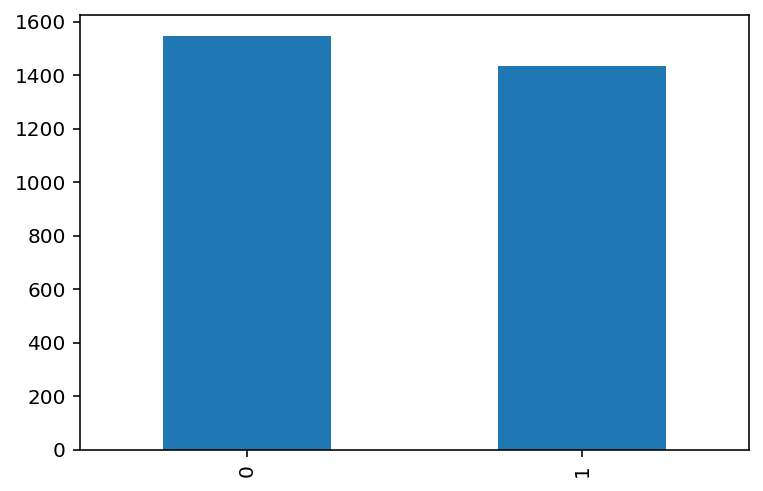

In [23]:
y.value_counts().plot(kind='bar')

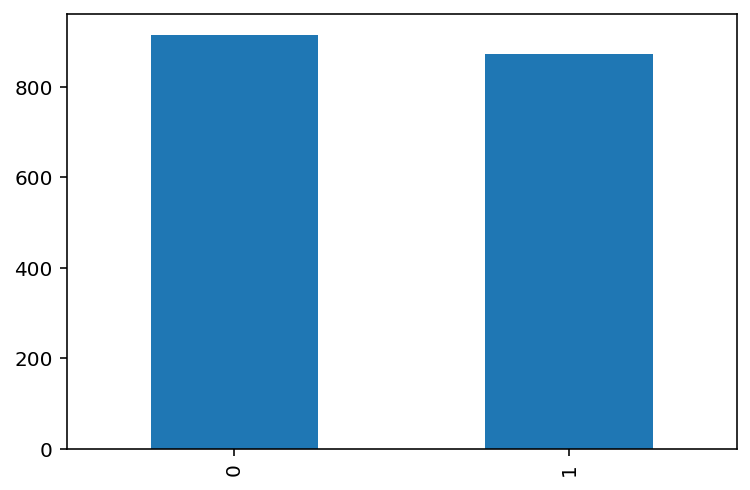

In [24]:
y_train.value_counts().plot(kind='bar')

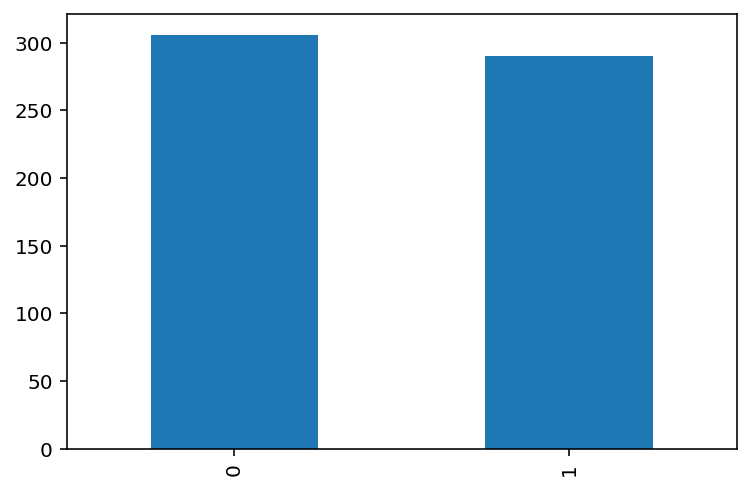

In [25]:
y_val.value_counts().plot(kind='bar')

> NOTE:

When asked to provide the performance metrics you can use the confusion matrix or the methods in `sklearn.metrics`.  
**Performance metrics** (at the very least):  
- Recall (Sensitivity)  
- Specificity  
- Precision  
- Balanced Accuracy  
- F1 Score  

Grid Search:
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html


In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
from sklearn.metrics import accuracy_score

# Q4

## Decision Tree Model

Let's start by training a single decision tree first!

1. Default decision tree:
    - Initiate the Decision Tree classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
    - Fit the model
    - Make predictions
    - Calculate accuracy score. What are the **training** and **validation** accuracies of the model?
    - Create confusion matrix
    - Provide the performance metrics for the **validation** set.


2. Using the training data perform hyper-parameter tuning. Use an appropriate metric for scoring (f1 is generally good).
    - Try several values for the `min_samples_split` hyper-parameter and apply cross validation (`GridSearchCV`) to find the best value.  
        - Using the best model provide the performance metrics for the validation set.
    - Try several values for the `max_depth` hyper-parameter and apply cross validation (`GridSearchCV`) to find the best value. 
        - Using the best model provide the performance metrics for the validation set.
    - Perform grid search (`GridSearchCV`) where you check for `min_samples_split` and `max_depth`.
        - Using the best model provide the performance metrics for the validation set.
        
        
3. Create a chart showing the feature importances based on the best model obtained.

In [28]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [29]:
# importing library to apply Decision Tree algorithm
# build 3rd model (Decision tree) with default parameters

dt1 = DecisionTreeClassifier()
dt1.fit(X_train,y_train)

dt1_train_pred = dt1.predict(X_train)
dt1_test_pred = dt1.predict(X_test)

# Printing classification report of train and test
print(classification_report(y_train, dt1_train_pred))
print(classification_report(y_test, dt1_test_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       915
           1       1.00      1.00      1.00       873

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788

              precision    recall  f1-score   support

           0       0.62      0.55      0.58       327
           1       0.52      0.59      0.55       270

    accuracy                           0.57       597
   macro avg       0.57      0.57      0.57       597
weighted avg       0.57      0.57      0.57       597



In [30]:
dt2 = DecisionTreeClassifier(max_depth=5)
dt2.fit(X_train,y_train)

dt2_train_pred = dt2.predict(X_train)
dt2_test_pred = dt2.predict(X_test)

# Printing classification report of train and test
print(classification_report(y_train, dt2_train_pred))
print(classification_report(y_test, dt2_test_pred))

# Now we are getting better metrics
# but still the recall values are not good enough 

              precision    recall  f1-score   support

           0       0.63      0.76      0.69       915
           1       0.68      0.52      0.59       873

    accuracy                           0.65      1788
   macro avg       0.65      0.64      0.64      1788
weighted avg       0.65      0.65      0.64      1788

              precision    recall  f1-score   support

           0       0.59      0.74      0.65       327
           1       0.54      0.38      0.45       270

    accuracy                           0.57       597
   macro avg       0.57      0.56      0.55       597
weighted avg       0.57      0.57      0.56       597



In [31]:
# Building 5th model (Decision tree) with 'max_depth' parameter as '5' and 'class_weight' parameter as 'balanced'
dt3 = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dt3.fit(X_train,y_train)

dt3_train_pred = dt3.predict(X_train)
dt3_test_pred = dt3.predict(X_test)

# Printing classification report of train and test
print(classification_report(y_train, dt3_train_pred))
print(classification_report(y_test, dt3_test_pred))

# By setting 'class_weight' parameter as 'balanced'
# now we are getting much better recall values

              precision    recall  f1-score   support

           0       0.65      0.68      0.66       915
           1       0.64      0.61      0.63       873

    accuracy                           0.65      1788
   macro avg       0.65      0.64      0.64      1788
weighted avg       0.65      0.65      0.64      1788

              precision    recall  f1-score   support

           0       0.61      0.65      0.63       327
           1       0.54      0.50      0.52       270

    accuracy                           0.58       597
   macro avg       0.58      0.58      0.58       597
weighted avg       0.58      0.58      0.58       597



In [32]:
#cross val

from sklearn.model_selection import cross_val_score

classifier = DecisionTreeClassifier(min_samples_split=10, max_depth=5)

all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)

print(all_accuracies)

[0.5726257  0.56424581 0.55307263 0.60504202 0.59383754]


In [33]:
from sklearn.model_selection import cross_val_score

classifier = DecisionTreeClassifier(min_samples_split=20, max_depth=10)

all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)

print(all_accuracies)

[0.53072626 0.58938547 0.56424581 0.59103641 0.56862745]


In [34]:
from sklearn.model_selection import GridSearchCV

grid_param = {
    'max_depth' : [1,2,3,4,5,6,7,8,9,10],
    'min_samples_split' : [1,2,3,4,5,6,7,8,9,10]
}

gd_sr1 = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

gd_sr1.fit(X_train, y_train)

best_parameters = gd_sr1.best_params_
print(best_parameters)

{'max_depth': 8, 'min_samples_split': 2}


In [35]:
# importing library to apply ramdomized grid search algorithm
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree

# hyper parameter tuning 
dt = tree.DecisionTreeClassifier(class_weight='balanced') 
param_grid = {'criterion':['gini','entropy'],
             'max_leaf_nodes': np.arange(5,30,1),
             'min_samples_split': np.arange(0.01,0.1,0.001),
             'max_depth':np.arange(5,15,20),
             'min_weight_fraction_leaf':np.arange(0.01,0.25,0.005)}

rsearch = RandomizedSearchCV(estimator=dt, param_distributions=param_grid,n_iter=20,n_jobs=-1)
rsearch.fit(X_train, y_train)

# printing metrics of train and test
print(rsearch.best_estimator_)
print("Train - Report")
print(classification_report(y_train,rsearch.predict(X_train)))
print("Test - Confusion Matrix")
print(classification_report(y_test,rsearch.predict(X_test)))

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=6,
                       min_samples_split=0.05799999999999996,
                       min_weight_fraction_leaf=0.11999999999999998)
Train - Report
              precision    recall  f1-score   support

           0       0.62      0.64      0.63       915
           1       0.61      0.59      0.60       873

    accuracy                           0.61      1788
   macro avg       0.61      0.61      0.61      1788
weighted avg       0.61      0.61      0.61      1788

Test - Confusion Matrix
              precision    recall  f1-score   support

           0       0.63      0.62      0.62       327
           1       0.55      0.55      0.55       270

    accuracy                           0.59       597
   macro avg       0.59      0.59      0.59       597
weighted avg       0.59      0.59      0.59       597



we can see here , we get one good model with train accuracy of 65% with max depth of 5

# Q5

## Random Forest model

1. Default Random Forest Classifier:
    - Initiate the Random Forest Classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
    - Fit the model
    - Make predictions
    - Calculate accuracy score. What are the **training** and **validation** accuracies of the model?
    - Create confusion matrix
    - Provide the performance metrics for the **validation** set.
    
    
2. Using the training data perform hyper-parameter tuning. Use an appropriate metric for scoring (f1 is generally good).
    - Perform grid search (`GridSearchCV`) where you check for `min_samples_split`, `max_depth`, and `n_estimators`.
        - Using the best model provide the performance metrics for the validation set.
       
3. Create a chart showing the feature importances based on the best model obtained.

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
# code
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

#printing classification report of train and test
print(classification_report(y_train, y_train_pred_rf))
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       915
           1       1.00      1.00      1.00       873

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788

              precision    recall  f1-score   support

           0       0.63      0.64      0.63       327
           1       0.56      0.55      0.55       270

    accuracy                           0.60       597
   macro avg       0.59      0.59      0.59       597
weighted avg       0.60      0.60      0.60       597



In [38]:
# code
rf1 = RandomForestClassifier(max_depth=5, random_state=123, n_estimators=50, class_weight="balanced")
rf1.fit(X_train,y_train)

y_train_pred_rf1 = rf1.predict(X_train)
y_test_pred_rf1 = rf1.predict(X_test)

#printing classification report of train and test
print(classification_report(y_train, y_train_pred_rf))
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       915
           1       1.00      1.00      1.00       873

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788

              precision    recall  f1-score   support

           0       0.63      0.64      0.63       327
           1       0.56      0.55      0.55       270

    accuracy                           0.60       597
   macro avg       0.59      0.59      0.59       597
weighted avg       0.60      0.60      0.60       597



In [39]:
# importing library to apply ramdomized grid search algorithm , random forest algorithm and metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, make_scorer

score_metric = make_scorer(recall_score)
# hyper parameter tuning
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {'criterion':['gini','entropy'],
              'n_estimators': np.arange(25,200,25),
              'min_samples_split': np.arange(0.001,0.1,0.01),
             'max_depth':np.arange(5,15,20)}

rsearch = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid,n_iter=20, n_jobs=3,scoring=score_metric)
rsearch.fit(X_train, y_train)

#printing train and test metrics 
print(rsearch.best_estimator_)
print("Train - Report")
print(classification_report(y_train,rsearch.predict(X_train)))
print("Test - Confusion Matrix")
print(classification_report(y_test,rsearch.predict(X_test)))

RandomForestClassifier(class_weight='balanced', max_depth=5,
                       min_samples_split=0.030999999999999996)
Train - Report
              precision    recall  f1-score   support

           0       0.70      0.62      0.66       915
           1       0.64      0.72      0.68       873

    accuracy                           0.67      1788
   macro avg       0.67      0.67      0.67      1788
weighted avg       0.67      0.67      0.67      1788

Test - Confusion Matrix
              precision    recall  f1-score   support

           0       0.65      0.60      0.62       327
           1       0.56      0.61      0.58       270

    accuracy                           0.60       597
   macro avg       0.60      0.61      0.60       597
weighted avg       0.61      0.60      0.61       597



# Q6

## Adaboost model

1. Default Adaboost classifier:
    - Initiate the Adaboost classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
    - Fit the model
    - Make predictions
    - Calculate accuracy score. What are the **training** and **validation** accuracies of the model?
    - Create confusion matrix
    - Provide the performance metrics for the **validation** set.
    
    
2. Using the training data perform hyper-parameter tuning. Use an appropriate metric for scoring (f1 is generally good).
    - Perform grid search (`GridSearchCV`) where you check for `learning_rate`, and `n_estimators`.
        - Using the best model provide the performance metrics for the validation set.
       
3. Create a chart showing the feature importances based on the best model obtained.

In [40]:
from sklearn.ensemble import AdaBoostClassifier

In [41]:
# YOUR CODE
ada_model1 = AdaBoostClassifier()

ada_model1.fit(X_train, y_train)

ada_pred1 = ada_model1.predict(X_val)

ada_acc1 = accuracy_score(y_val, ada_pred1)

print(ada_acc)

0.5855704697986577


In [42]:
print(confusion_matrix(y_val, ada_pred1))
print("\n")
print(classification_report(y_val, ada_pred1))

[[177 129]
 [118 172]]


              precision    recall  f1-score   support

           0       0.60      0.58      0.59       306
           1       0.57      0.59      0.58       290

    accuracy                           0.59       596
   macro avg       0.59      0.59      0.59       596
weighted avg       0.59      0.59      0.59       596



In [43]:
classifier = AdaBoostClassifier()

Ada_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)

print(Ada_accuracies)

[0.59776536 0.61731844 0.60614525 0.61344538 0.59943978]


In [44]:
#Grid search
from sklearn.model_selection import GridSearchCV
ada_model = AdaBoostClassifier()
grid_param = {
    'learning_rate' : [.1,.2,.3,4.,.5,.6,.7,.8,.9,1.0],
    'n_estimators' : [10,50,100,150]
}

gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

gd_sr.fit(X_train, y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)

{'learning_rate': 0.3, 'n_estimators': 50}


In [65]:
ada_model2 = AdaBoostClassifier(learning_rate=0.3 , n_estimators=50)

ada_model2.fit(X_train, y_train)

ada_pred2 = ada_model2.predict(X_val)

In [66]:
print(confusion_matrix(y_val, ada_pred2))
print("\n")
print(classification_report(y_val, ada_pred2))

[[185 121]
 [124 166]]


              precision    recall  f1-score   support

           0       0.60      0.60      0.60       306
           1       0.58      0.57      0.58       290

    accuracy                           0.59       596
   macro avg       0.59      0.59      0.59       596
weighted avg       0.59      0.59      0.59       596



here we can see that there is no increase in the accuracy after applying grid search

# Q7

## Gradient Boosting Machine

1. Default Gradient Boosting classifier:
    - Initiate the Gradient Boosting classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
    - Fit the model
    - Make predictions
    - Calculate accuracy score. What are the **training** and **validation** accuracies of the model?
    - Create confusion matrix
    - Provide the performance metrics for the **validation** set.
    
    
2. Using the training data perform hyper-parameter tuning. Use an appropriate metric for scoring (f1 is generally good).
    - Perform grid search (`GridSearchCV`) where you check for `learning_rate`, and `n_estimators`.
        - Using the best model provide the performance metrics for the validation set.
        
3. Create a chart showing the feature importances based on the best model obtained.

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
# YOUR CODE
gb_model = GradientBoostingClassifier()

gb_model.fit(X_train, y_train)

gb_pred = gb_model.predict(X_val)

gb_acc = accuracy_score(y_val, gb_pred)

print(gb_acc)

0.6124161073825504


In [55]:
print(confusion_matrix(y_val, gb_pred))
print("\n")
print(classification_report(y_val, gb_pred))

[[193 113]
 [118 172]]


              precision    recall  f1-score   support

           0       0.62      0.63      0.63       306
           1       0.60      0.59      0.60       290

    accuracy                           0.61       596
   macro avg       0.61      0.61      0.61       596
weighted avg       0.61      0.61      0.61       596



In [59]:
classifier_gb = GradientBoostingClassifier()

Gb_accuracies = cross_val_score(estimator=classifier_gb, X=X_train, y=y_train, cv=5)

print(Gb_accuracies)

[0.61731844 0.63128492 0.62849162 0.62184874 0.58823529]


In [61]:
#Grid search
grid_param = {
    'learning_rate' : [.1,.2,.3,4.,.5,.6,.7,.8,.9,1.0],
    'n_estimators' : [10,50,100,150]
}

gd_sr_gb = GridSearchCV(estimator=classifier_gb,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

gd_sr_gb.fit(X_train, y_train)

best_parameters = gd_sr_gb.best_params_
print(best_parameters)

{'learning_rate': 0.1, 'n_estimators': 50}


In [63]:
gb_model_2 = GradientBoostingClassifier(learning_rate=0.1 , n_estimators=50)

gb_model_2.fit(X_train, y_train)

gb_pred_2 = gb_model_2.predict(X_val)

In [67]:
print(confusion_matrix(y_val, gb_pred_2))
print("\n")
print(classification_report(y_val, gb_pred_2))

[[191 115]
 [117 173]]


              precision    recall  f1-score   support

           0       0.62      0.62      0.62       306
           1       0.60      0.60      0.60       290

    accuracy                           0.61       596
   macro avg       0.61      0.61      0.61       596
weighted avg       0.61      0.61      0.61       596



there is no change in accuracy after applying the grid search to the gradient boosting default model

# Q8 (15 points)

- Using one or more of the Decision Tree, Random Forest, Adaboost, and Gradient Boosting classifer models:
    - Think of other ways of improving the recall and F1-score and list at least two possibilities.
    - Implement both of the methods you proposed. 
    - Is the model F1-score increasing?

Improving recall and F1-score in a decision tree, random forest, Adaboost or Gradient Boosting classifier can be achieved in several ways:

Feature Engineering:
Feature scaling, transforming variables, or creating new features that better separate classes may help increase recall and F1-score.
Hyperparameter tuning:
Fine-tuning the model's parameters such as learning rate, tree depth, number of estimators, etc. may improve the model's performance.

we will try using bagging with all the models used above

In [68]:
# YOUR CODE
from sklearn.ensemble import BaggingClassifier

bag_tree_model = BaggingClassifier(base_estimator=DecisionTreeClassifier())

bag_tree_model.fit(X_train, y_train)

bag_tree_pred = bag_tree_model.predict(X_val)

print(confusion_matrix(y_val, bag_tree_pred ))
print("\n")
print(classification_report(y_val, bag_tree_pred))

[[204 102]
 [154 136]]


              precision    recall  f1-score   support

           0       0.57      0.67      0.61       306
           1       0.57      0.47      0.52       290

    accuracy                           0.57       596
   macro avg       0.57      0.57      0.56       596
weighted avg       0.57      0.57      0.57       596



In [69]:
bag_rf_model = BaggingClassifier(base_estimator=RandomForestClassifier())

bag_rf_model.fit(X_train, y_train)

bag_rf_pred = bag_rf_model.predict(X_val)

print(confusion_matrix(y_val, bag_rf_pred ))
print("\n")
print(classification_report(y_val, bag_rf_pred))

[[187 119]
 [107 183]]


              precision    recall  f1-score   support

           0       0.64      0.61      0.62       306
           1       0.61      0.63      0.62       290

    accuracy                           0.62       596
   macro avg       0.62      0.62      0.62       596
weighted avg       0.62      0.62      0.62       596



In [70]:
bag_ada_model = BaggingClassifier(base_estimator=AdaBoostClassifier())

bag_ada_model.fit(X_train, y_train)

bag_ada_pred = bag_ada_model.predict(X_val)

print(confusion_matrix(y_val, bag_ada_pred ))
print("\n")
print(classification_report(y_val, bag_ada_pred))

[[177 129]
 [118 172]]


              precision    recall  f1-score   support

           0       0.60      0.58      0.59       306
           1       0.57      0.59      0.58       290

    accuracy                           0.59       596
   macro avg       0.59      0.59      0.59       596
weighted avg       0.59      0.59      0.59       596



In [72]:
bag_gb_model = BaggingClassifier(base_estimator=GradientBoostingClassifier())

bag_gb_model.fit(X_train, y_train)

bag_gb_pred = bag_gb_model.predict(X_val)

print(confusion_matrix(y_val, bag_gb_pred ))
print("\n")
print(classification_report(y_val, bag_gb_pred))

[[196 110]
 [118 172]]


              precision    recall  f1-score   support

           0       0.62      0.64      0.63       306
           1       0.61      0.59      0.60       290

    accuracy                           0.62       596
   macro avg       0.62      0.62      0.62       596
weighted avg       0.62      0.62      0.62       596



We have tried the ensemble methods of bagging with all the models implemented above

now we will try the hyper parameter tuning methods for tuning the models

In [81]:
#best Decision tree

dt2 = DecisionTreeClassifier(max_depth=5)
dt2.fit(X_train,y_train)

dt2_train_pred = dt2.predict(X_train)
dt2_test_pred = dt2.predict(X_test)

# Printing classification report of train and test
print(classification_report(y_train, dt2_train_pred))
print(classification_report(y_test, dt2_test_pred))

              precision    recall  f1-score   support

           0       0.63      0.76      0.69       915
           1       0.68      0.53      0.59       873

    accuracy                           0.65      1788
   macro avg       0.65      0.64      0.64      1788
weighted avg       0.65      0.65      0.64      1788

              precision    recall  f1-score   support

           0       0.59      0.72      0.65       327
           1       0.54      0.39      0.45       270

    accuracy                           0.57       597
   macro avg       0.56      0.55      0.55       597
weighted avg       0.56      0.57      0.56       597



In [82]:
# best random forest model
# importing library to apply ramdomized grid search algorithm , random forest algorithm and metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, make_scorer

score_metric = make_scorer(recall_score)
# hyper parameter tuning
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {'criterion':['gini','entropy'],
              'n_estimators': np.arange(25,200,25),
              'min_samples_split': np.arange(0.001,0.1,0.01),
             'max_depth':np.arange(5,15,20)}

rsearch = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid,n_iter=20, n_jobs=3,scoring=score_metric)
rsearch.fit(X_train, y_train)

#printing train and test metrics 
print(rsearch.best_estimator_)
print("Train - Report")
print(classification_report(y_train,rsearch.predict(X_train)))
print("Test - Confusion Matrix")
print(classification_report(y_test,rsearch.predict(X_test)))

RandomForestClassifier(class_weight='balanced', max_depth=5,
                       min_samples_split=0.05099999999999999, n_estimators=50)
Train - Report
              precision    recall  f1-score   support

           0       0.69      0.61      0.65       915
           1       0.64      0.71      0.67       873

    accuracy                           0.66      1788
   macro avg       0.66      0.66      0.66      1788
weighted avg       0.66      0.66      0.66      1788

Test - Confusion Matrix
              precision    recall  f1-score   support

           0       0.64      0.60      0.62       327
           1       0.55      0.59      0.57       270

    accuracy                           0.59       597
   macro avg       0.59      0.59      0.59       597
weighted avg       0.60      0.59      0.60       597



# Q9 (15 points)

- Choose the best fitted model for each of the classifiers (1 model for each of Decision Tree, Random Forest, Adaboost, and Gradient Boosting)
- Create a table summarizing results on the **test set**:
    - Create confusion matrix for each model
    - Provide the performance metrics on the test set for each model.

Which one is the winner among all?

# best decision tree model



In [117]:
# importing library to apply ramdomized grid search algorithm
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree

# hyper parameter tuning 
dt = tree.DecisionTreeClassifier(class_weight='balanced') 
param_grid = {'criterion':['gini','entropy'],
             'max_leaf_nodes': np.arange(5,30,1),
             'min_samples_split': np.arange(0.01,0.1,0.001),
             'max_depth':np.arange(5,15,20),
             'min_weight_fraction_leaf':np.arange(0.01,0.25,0.005)}

rsearch = RandomizedSearchCV(estimator=dt, param_distributions=param_grid,n_iter=20,n_jobs=-1)
rsearch.fit(X_train, y_train)

# printing metrics of train and test
print(rsearch.best_estimator_)
print("Train - Report")
print(classification_report(y_train,rsearch.predict(X_train)))
print("Test - Confusion Matrix")
print(classification_report(y_test,rsearch.predict(X_test)))

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, max_leaf_nodes=15,
                       min_samples_split=0.08199999999999993,
                       min_weight_fraction_leaf=0.12999999999999998)
Train - Report
              precision    recall  f1-score   support

           0       0.62      0.64      0.63       915
           1       0.61      0.59      0.60       873

    accuracy                           0.61      1788
   macro avg       0.61      0.61      0.61      1788
weighted avg       0.61      0.61      0.61      1788

Test - Confusion Matrix
              precision    recall  f1-score   support

           0       0.63      0.62      0.62       327
           1       0.55      0.55      0.55       270

    accuracy                           0.59       597
   macro avg       0.59      0.59      0.59       597
weighted avg       0.59      0.59      0.59       597



# best random forest model

In [118]:
# importing library to apply ramdomized grid search algorithm , random forest algorithm and metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, make_scorer

score_metric = make_scorer(recall_score)
# hyper parameter tuning
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {'criterion':['gini','entropy'],
              'n_estimators': np.arange(25,200,25),
              'min_samples_split': np.arange(0.001,0.1,0.01),
             'max_depth':np.arange(5,15,20)}

rsearch = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid,n_iter=20, n_jobs=3,scoring=score_metric)
rsearch.fit(X_train, y_train)

#printing train and test metrics 
print(rsearch.best_estimator_)
print("Train - Report")
print(classification_report(y_train,rsearch.predict(X_train)))
print("Test - Confusion Matrix")
print(classification_report(y_test,rsearch.predict(X_test)))

RandomForestClassifier(class_weight='balanced', max_depth=5,
                       min_samples_split=0.030999999999999996,
                       n_estimators=150)
Train - Report
              precision    recall  f1-score   support

           0       0.71      0.62      0.66       915
           1       0.65      0.73      0.69       873

    accuracy                           0.68      1788
   macro avg       0.68      0.68      0.67      1788
weighted avg       0.68      0.68      0.67      1788

Test - Confusion Matrix
              precision    recall  f1-score   support

           0       0.65      0.57      0.61       327
           1       0.55      0.63      0.59       270

    accuracy                           0.60       597
   macro avg       0.60      0.60      0.60       597
weighted avg       0.60      0.60      0.60       597



# ada boost

In [123]:
ada_model2 = AdaBoostClassifier(learning_rate=0.3 , n_estimators=50)

ada_model2.fit(X_train, y_train)

ada_pred2 = ada_model2.predict(X_val)
print(confusion_matrix(y_val, ada_pred2))
print("\n")
print(classification_report(y_val, ada_pred2))

[[185 121]
 [124 166]]


              precision    recall  f1-score   support

           0       0.60      0.60      0.60       306
           1       0.58      0.57      0.58       290

    accuracy                           0.59       596
   macro avg       0.59      0.59      0.59       596
weighted avg       0.59      0.59      0.59       596



# Gradient Boosting model

In [124]:
gb_model_2 = GradientBoostingClassifier(learning_rate=0.1 , n_estimators=50)

gb_model_2.fit(X_train, y_train)

gb_pred_2 = gb_model_2.predict(X_val)

print(confusion_matrix(y_val, gb_pred_2))
print("\n")
print(classification_report(y_val, gb_pred_2))



[[191 115]
 [117 173]]


              precision    recall  f1-score   support

           0       0.62      0.62      0.62       306
           1       0.60      0.60      0.60       290

    accuracy                           0.61       596
   macro avg       0.61      0.61      0.61       596
weighted avg       0.61      0.61      0.61       596



# Random forests models perform the best among all of those other models

# Great Job!